In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df

,record_ID,week,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold
0,1,17/01/11,8091,216418,99.0375,111.8625,0,0,20
1,2,17/01/11,8091,216419,99.0375,99.0375,0,0,28
2,3,17/01/11,8091,216425,133.9500,133.9500,0,0,19
3,4,17/01/11,8091,216233,133.9500,133.9500,0,0,44
4,5,17/01/11,8091,217390,141.0750,141.0750,0,0,52
...,...,...,...,...,...,...,...,...,...
150145,212638,09/07/13,9984,223245,235.8375,235.8375,0,0,38
150146,212639,09/07/13,9984,223153,235.8375,235.8375,0,0,30
150147,212642,09/07/13,9984,245338,357.6750,483.7875,1,1,31
150148,212643,09/07/13,9984,547934,141.7875,191.6625,0,1,12


In [6]:
df[['day','month','year']]=df['week'].str.split('/',expand=True)

In [8]:
df = df.drop('week',axis=1)

In [9]:
df

,record_ID,store_id,sku_id,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year
0,1,8091,216418,99.0375,111.8625,0,0,20,17,01,11
1,2,8091,216419,99.0375,99.0375,0,0,28,17,01,11
2,3,8091,216425,133.9500,133.9500,0,0,19,17,01,11
3,4,8091,216233,133.9500,133.9500,0,0,44,17,01,11
4,5,8091,217390,141.0750,141.0750,0,0,52,17,01,11
...,...,...,...,...,...,...,...,...,...,...,...
150145,212638,9984,223245,235.8375,235.8375,0,0,38,09,07,13
150146,212639,9984,223153,235.8375,235.8375,0,0,30,09,07,13
150147,212642,9984,245338,357.6750,483.7875,1,1,31,09,07,13
150148,212643,9984,547934,141.7875,191.6625,0,1,12,09,07,13


In [10]:
from sklearn.ensemble import RandomForestRegressor

In [43]:
from sklearn.model_selection import train_test_split
X,y = df.drop('units_sold', axis=1),df['units_sold']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [44]:
model = RandomForestRegressor(n_jobs=-1)
model.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1)

In [45]:
model.score(X_test,y_test)

0.8260526435413456

In [46]:
from sklearn.metrics import root_mean_squared_error

In [47]:
y_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_pred,y_test)

In [48]:
rmse

17.8031773413037

In [52]:
df.units_sold.describe()

count    148636.000000
mean         47.842616
std          42.898247
min           1.000000
25%          19.000000
50%          35.000000
75%          61.000000
max         282.000000
Name: units_sold, dtype: float64

<Axes: >

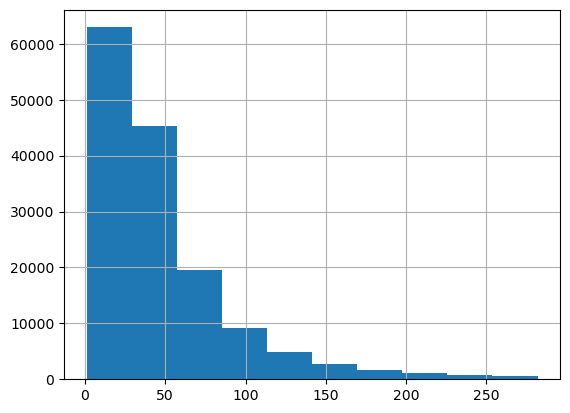

In [53]:
df.units_sold.hist()

In [54]:
import matplotlib.pyplot as plt

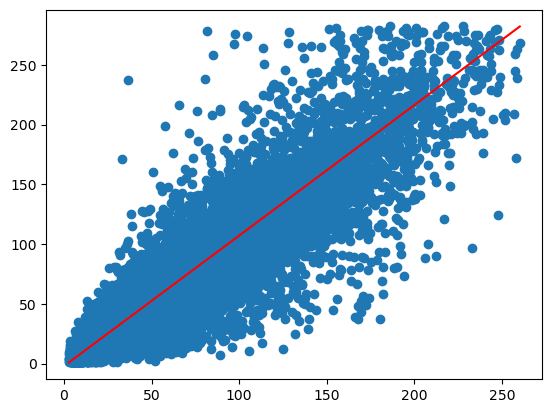

In [55]:
plt.scatter(y_pred,y_test)
plt.plot(np.linspace(y_pred.min(),y_pred.max()),np.linspace(y_test.min(),y_test.max()),color='red')

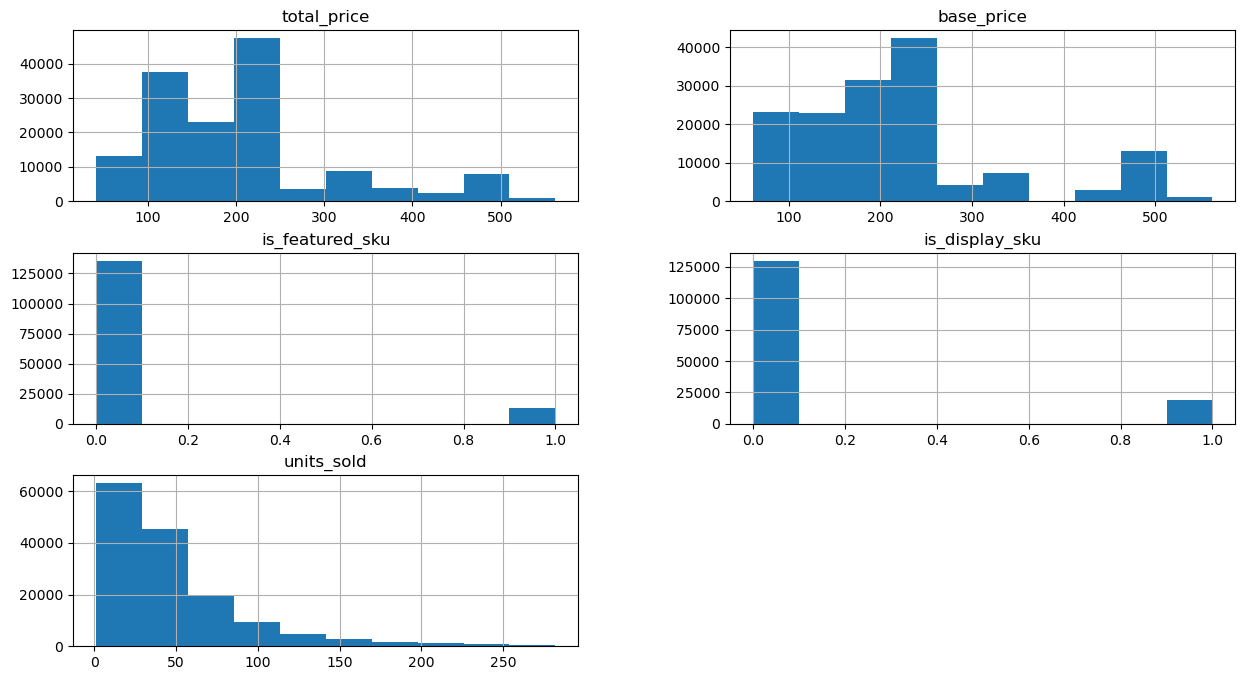

In [56]:
df.hist(figsize=(15,8))
plt.show()

In [57]:
df=df.drop('record_ID', axis=1)
df

KeyError: "['record_ID'] not found in axis"

In [ ]:
len(df.store_id.unique())

In [58]:
len(df.sku_id.unique())

AttributeError: 'DataFrame' object has no attribute 'sku_id'

In [59]:
df = df[df.units_sold< df.units_sold.quantile(0.99)]

<Axes: >

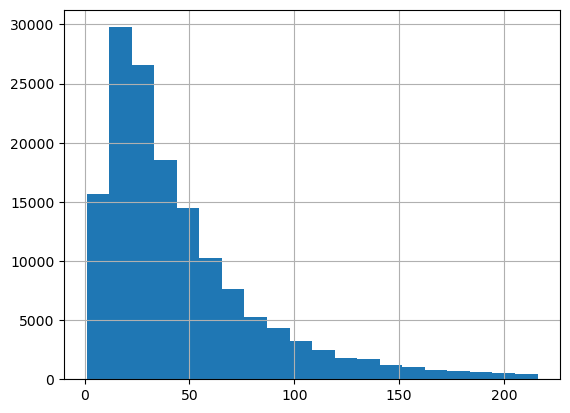

In [60]:
df.units_sold.hist(bins=20)

In [61]:
df =df.join(pd.get_dummies(df.store_id,prefix='store')).drop('store_id',axis=1)
df =df.join(pd.get_dummies(df.sku_id,prefix='store')).drop('sku_id',axis=1)


AttributeError: 'DataFrame' object has no attribute 'store_id'

In [62]:
df

,total_price,base_price,is_featured_sku,is_display_sku,units_sold,day,month,year,store_8023,store_8058,...,store_320485,store_327492,store_378934,store_398721,store_545621,store_546789,store_547934,store_600934,store_673209,store_679023
0,99.0375,111.8625,0,0,20,17,01,11,False,False,...,False,False,False,False,False,False,False,False,False,False
1,99.0375,99.0375,0,0,28,17,01,11,False,False,...,False,False,False,False,False,False,False,False,False,False
2,133.9500,133.9500,0,0,19,17,01,11,False,False,...,False,False,False,False,False,False,False,False,False,False
3,133.9500,133.9500,0,0,44,17,01,11,False,False,...,False,False,False,False,False,False,False,False,False,False
4,141.0750,141.0750,0,0,52,17,01,11,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150145,235.8375,235.8375,0,0,38,09,07,13,False,False,...,False,False,False,False,False,False,False,False,False,False
150146,235.8375,235.8375,0,0,30,09,07,13,False,False,...,False,False,False,False,False,False,False,False,False,False
150147,357.6750,483.7875,1,1,31,09,07,13,False,False,...,False,False,False,False,False,False,False,False,False,False
150148,141.7875,191.6625,0,1,12,09,07,13,False,False,...,False,False,False,False,False,False,True,False,False,False


In [63]:
model = RandomForestRegressor(n_jobs=-1)
X,y= df.drop('units_sold',axis=1), df['units_sold']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [64]:
model.fit(X_train,y_train)

RandomForestRegressor(n_jobs=-1)

In [65]:
model.score(X_test,y_test)

0.8079839557030667

In [66]:
y_pred = model.predict(X_test)
rmse = root_mean_squared_error(y_pred,y_test)
rmse

16.495049895299747

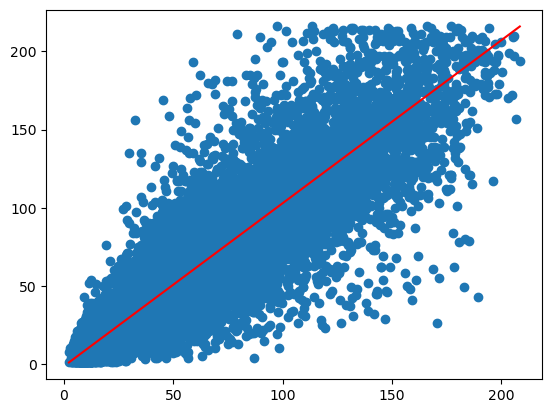

In [67]:
plt.scatter(y_pred,y_test)
plt.plot(np.linspace(y_pred.min(),y_pred.max()),np.linspace(y_test.min(),y_test.max()),color='red')

In [76]:
from sklearn.model_selection import GridSearchCV

param_grid={
    'n_estimators':[10,20],
    'min_samples_split':[2,3]
}

model = RandomForestRegressor(n_jobs = -1)
grid_search = GridSearchCV(model,param_grid,verbose=2,cv=3)
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits
[CV] END ...............min_samples_split=2, n_estimators=10; total time=   1.8s
[CV] END ...............min_samples_split=2, n_estimators=10; total time=   1.9s
[CV] END ...............min_samples_split=2, n_estimators=10; total time=   2.1s
[CV] END ...............min_samples_split=2, n_estimators=20; total time=   3.4s
[CV] END ...............min_samples_split=2, n_estimators=20; total time=   3.1s
[CV] END ...............min_samples_split=2, n_estimators=20; total time=   3.4s
[CV] END ...............min_samples_split=3, n_estimators=10; total time=   1.7s
[CV] END ...............min_samples_split=3, n_estimators=10; total time=   1.8s
[CV] END ...............min_samples_split=3, n_estimators=10; total time=   1.6s
[CV] END ...............min_samples_split=3, n_estimators=20; total time=   3.2s
[CV] END ...............min_samples_split=3, n_estimators=20; total time=   3.7s
[CV] END ...............min_samples_split=3, n_es

GridSearchCV(cv=3, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid={'min_samples_split': [2, 3], 'n_estimators': [10, 20]},
             verbose=2)

In [77]:
best_model = grid_search.best_estimator_

In [78]:
grid_search.best_params_

{'min_samples_split': 2, 'n_estimators': 20}

In [79]:
best_model.score(X_test,y_test)

0.8015091654213473